In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
import datetime
import ipywidgets as widgets

In [72]:
# biblioteki cikit-learn
from sklearn.model_selection import train_test_split # podział na zbiór testowy i treningowy
from sklearn.metrics import mean_squared_error # funkcja obliczająca metrykę
from sklearn.tree import DecisionTreeRegressor # estymator regresji=regresor
from sklearn.preprocessing import LabelEncoder # funkcja do kodowania etykiet na liczby całkowite
from sklearn.model_selection import GridSearchCV # funkcja przeszukiwania przestrzeni parametrów i walidacji krzyżowej

In [73]:
import math
x = float('nan')
math.isnan(x)

True

In [74]:
# link do folderu z GITA:
%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python"

D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python


In [75]:
# link do folderu z GITA:
%cd "D:\PYTHON UBER"

D:\PYTHON UBER


### Analiza ilości przypadków na dany rok - korelacja kolumn pokazuje, że nastąpił równomierny spadek przypadków od 2004 do 2015

In [5]:
yr=pd.read_csv("./year.csv")
yr.head(20)

,CASEID,PSU,AGE,BAGAVAIL,BAGFAIL,CHTYPE,HEIGHT,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,WEIGHT,HOSPSTAY,TREATMNT
0,12274,12274,12005,11501,10507,12273,10057,11871,10811,12273,12273,12213,12089,10146,11665,12012
1,9861,9861,9690,9175,8371,9858,7893,9508,8579,9858,9858,9815,9759,7973,9321,9641
2,10898,10898,10671,9922,9127,10895,8824,10482,9468,10895,10893,10853,10783,8977,10361,10657
3,10808,10808,10577,9804,8811,10805,8666,10424,9355,10805,10805,10775,10679,8813,10252,10589
4,10831,10831,10624,10091,9108,10831,8678,10372,9741,10831,10831,10805,10716,8850,10376,10586
5,11025,11025,10692,6666,5824,7124,6270,10560,6397,11023,11023,7112,10850,6481,6861,6996
6,10212,10212,9869,5745,5039,6208,5306,9793,5510,10210,10210,6205,10029,5464,5996,6091
7,8938,8938,8702,4834,4235,5196,4417,8549,4651,8937,8937,5207,8776,4586,4982,5137
8,7396,7396,7168,3329,2936,4070,2820,7104,3223,7396,7390,7310,7267,3039,3835,3991
9,7083,7083,6786,3228,2810,3797,2965,6832,3158,7082,7079,7010,6934,3064,3644,3741


In [6]:
cM= yr.corr()
cM

,CASEID,PSU,AGE,BAGAVAIL,BAGFAIL,CHTYPE,HEIGHT,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,WEIGHT,HOSPSTAY,TREATMNT
CASEID,1.000000,1.000000,0.999712,0.903276,0.895081,0.896727,0.917807,0.999871,0.904481,1.000000,1.000000,0.736582,0.999920,0.923551,0.900576,0.897889
PSU,1.000000,1.000000,0.999712,0.903276,0.895081,0.896727,0.917807,0.999871,0.904481,1.000000,1.000000,0.736582,0.999920,0.923551,0.900576,0.897889
AGE,0.999712,0.999712,1.000000,0.911748,0.903857,0.905366,0.925347,0.999655,0.912854,0.999711,0.999712,0.746674,0.999872,0.930909,0.909007,0.906482
BAGAVAIL,0.903276,0.903276,0.911748,1.000000,0.999620,0.998977,0.998267,0.906755,0.999708,0.903245,0.903279,0.921419,0.907477,0.997826,0.999235,0.999022
BAGFAIL,0.895081,0.895081,0.903857,0.999620,1.000000,0.999048,0.997164,0.898806,0.999117,0.895048,0.895078,0.927266,0.899454,0.996458,0.999093,0.999044
CHTYPE,0.896727,0.896727,0.905366,0.998977,0.999048,1.000000,0.996280,0.900461,0.998855,0.896693,0.896702,0.933447,0.901131,0.996040,0.999889,0.999989
HEIGHT,0.917807,0.917807,0.925347,0.998267,0.997164,0.996280,1.000000,0.921030,0.998234,0.917767,0.917818,0.906646,0.921662,0.999791,0.997072,0.996484
INJSEV,0.999871,0.999871,0.999655,0.906755,0.898806,0.900461,0.921030,1.000000,0.907737,0.999869,0.999867,0.743782,0.999815,0.926571,0.904167,0.901614
MANUSE,0.904481,0.904481,0.912854,0.999708,0.999117,0.998855,0.998234,0.907737,1.000000,0.904453,0.904487,0.920962,0.908724,0.998028,0.999336,0.998908
OCCNO,1.000000,1.000000,0.999711,0.903245,0.895048,0.896693,0.917767,0.999869,0.904453,1.000000,1.000000,0.736584,0.999918,0.923514,0.900544,0.897855


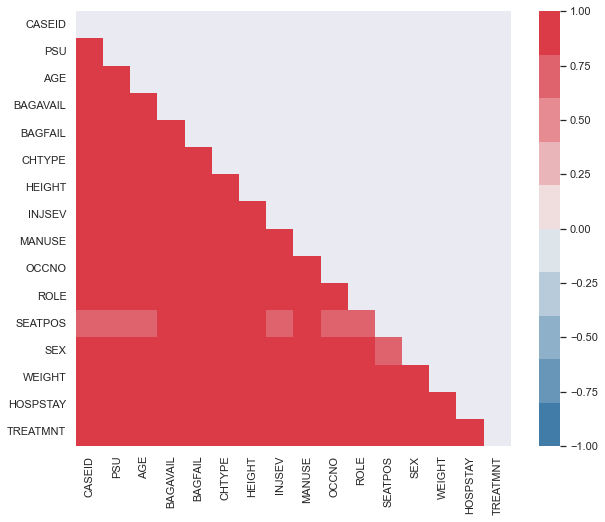

In [7]:
sns.set(rc={'figure.figsize':(10,8)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(cM), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(cM,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

In [30]:
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
dfo.describe()

,PSU,YEAR,AGE,BAGAVAIL,BAGFAIL,CHTYPE,HEIGHT,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,WEIGHT,HOSPSTAY,TREATMNT,STRATIF
count,110759.000000,110759.000000,107828.000000,79707.000000,71489.000000,87190.000000,70945.000000,106476.000000,76170.000000,110741.000000,110728.000000,98612.000000,109090.000000,72536.000000,83173.000000,85467.000000,110756.000000
mean,42.613332,2008.776957,3.157714,0.741779,0.745625,0.145005,3.704983,0.955896,1.785585,1.544640,1.338930,1.285371,0.462059,4.109118,1.059731,2.252589,3.459000
std,29.074442,3.268448,1.479447,0.437659,0.440812,0.897707,0.833575,0.975968,0.410419,0.977795,0.473348,0.783356,0.513523,1.134744,0.334376,2.095979,1.267495
min,2.000000,2004.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,11.000000,2006.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,2.000000
50%,45.000000,2009.000000,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,3.000000,4.000000
75%,74.000000,2011.000000,4.000000,1.000000,1.000000,0.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,5.000000,1.000000,4.000000,4.000000
max,82.000000,2015.000000,6.000000,1.000000,2.000000,8.000000,6.000000,4.000000,2.000000,19.000000,2.000000,6.000000,2.000000,7.000000,5.000000,8.000000,5.000000


### W tym notebooku zaprezentowano jak zmieniała się ilość przypadków przez lata i od jakie czynniki miały na to wpływ. W tej części nie badamy zależności od najgorszego typu zdarzenia(INJSEV=4)

## BAGFAIL - awaria systemu poduszki | spadek przypadków przez lata | 0 -brak poduszki; 2 - awaria | linia trendu

In [31]:
dfo.groupby(['YEAR','BAGFAIL'])['INJSEV','BAGFAIL'].count().head(42)

C:\Users\tk\AppData\Local\Temp\ipykernel_9080\2106176001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfo.groupby(['YEAR','BAGFAIL'])['INJSEV','BAGFAIL'].count().head(42)


INJSEV  BAGFAIL
YEAR BAGFAIL                 
2004 0.0        3861     4042
     1.0        6266     6425
     2.0          40       40
2005 0.0        2888     3021
     1.0        5175     5322
     2.0          27       28
2006 0.0        2948     3089
     1.0        5803     6016
     2.0          22       22
2007 0.0        2596     2695
     1.0        5906     6100
     2.0          15       16
2008 0.0        2259     2401
     1.0        6461     6693
     2.0          14       14
2009 0.0         840      877
     1.0        4750     4933
     2.0          14       14
2010 0.0         693      744
     1.0        4141     4286
     2.0           9        9
2011 0.0         435      476
     1.0        3590     3754
     2.0           5        5
2012 0.0         349      364
     1.0        2476     2565
     2.0           7        7
2013 0.0         281      293
     1.0        2430     2511
     2.0           6        6
2014 0.0         177      194
     1.0        2286     2379
     2.0           5        5
2015 0.0         148      155
     1.0        1895     1988

In [32]:
yearly_bagfail=dfo.groupby(["BAGFAIL"])['BAGFAIL'].count()/dfo.shape[0]
yearly_bagfail

BAGFAIL
0.0    0.165684
1.0    0.478264
2.0    0.001499
Name: BAGFAIL, dtype: float64

In [76]:
bgfq=pd.read_csv("./BAGFAIL_Q.csv",sep=';')
bgfq.head(30)

,YEAR,BAGFAIL,BAGFAIL_Q
0,2004,0.0,4042
1,2004,1.0,6425
2,2004,2.0,40
3,2005,0.0,3021
4,2005,1.0,5322
5,2005,2.0,28
6,2006,0.0,3089
7,2006,1.0,6016
8,2006,2.0,22
9,2007,0.0,2695


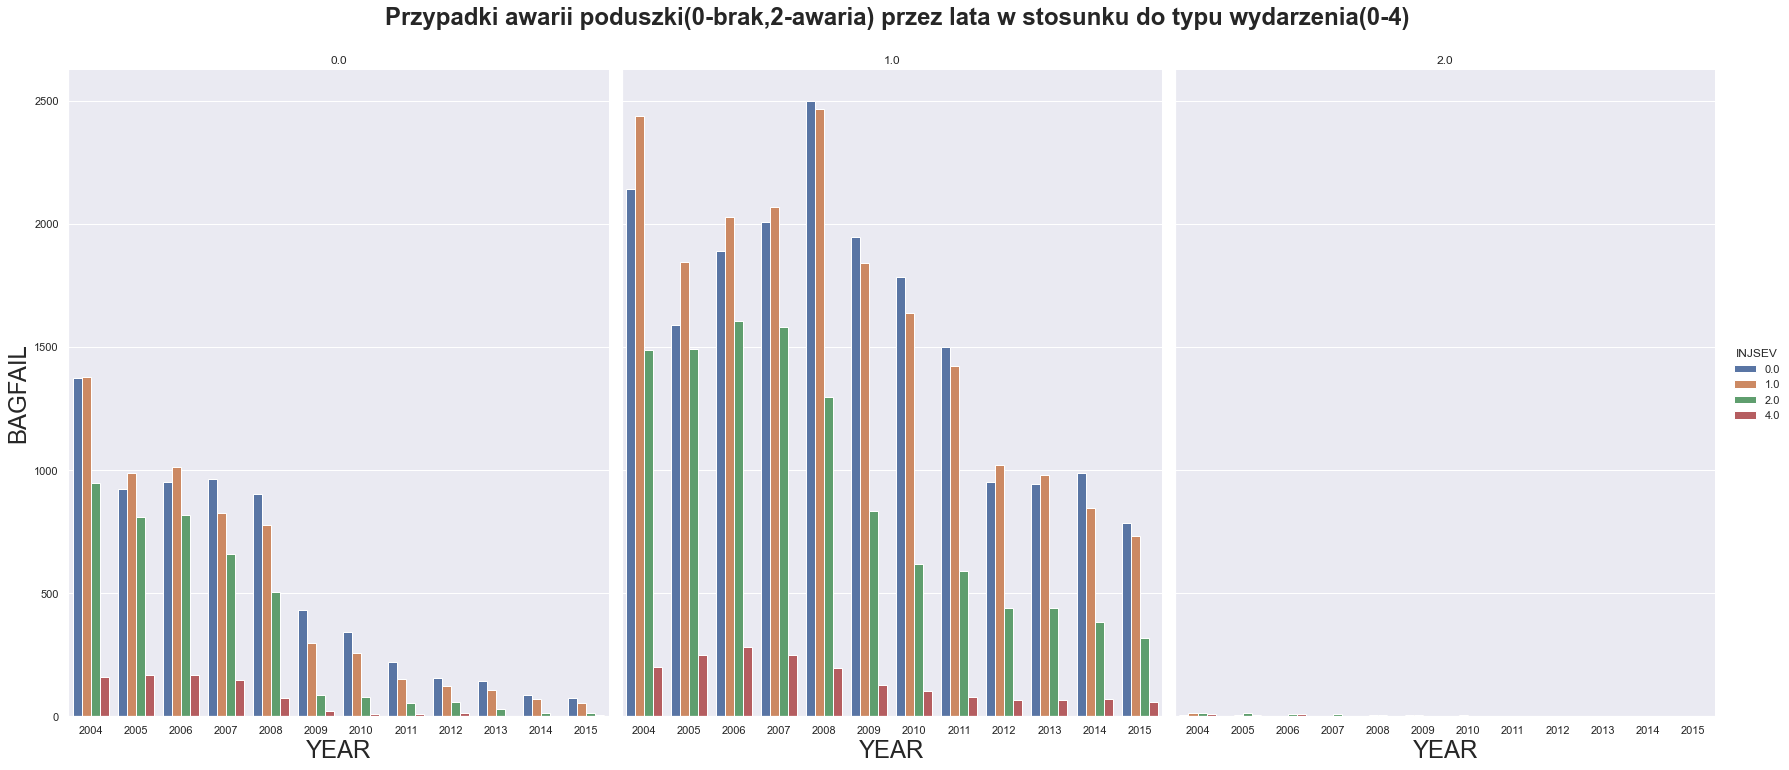

In [77]:
g = sns.catplot(data=dfo, x='YEAR', col="BAGFAIL", hue="INJSEV", kind='count',aspect=0.8,height=10, sharey = True)
g.set_axis_labels("YEAR", "BAGFAIL",fontsize=24)
g._legend.set_title('INJSEV')    
g.set_titles('{col_name}')
g.fig.suptitle('Przypadki awarii poduszki(0-brak,2-awaria) przez lata w stosunku do typu wydarzenia(0-4)', y=1.05, fontsize=24, fontweight='semibold');

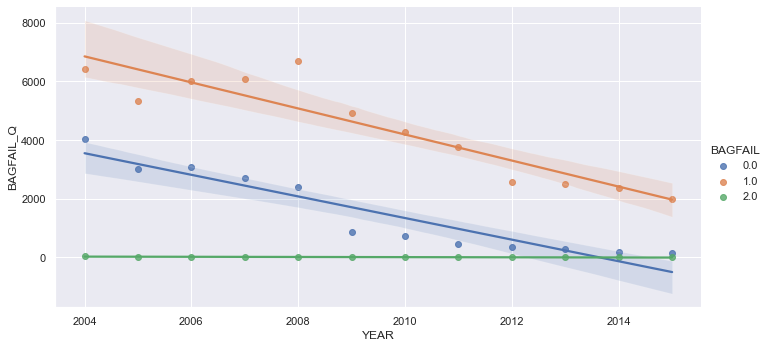

In [79]:
sns.lmplot(data=bgfq[((bgfq['BAGFAIL'] == 0)| (bgfq['BAGFAIL'] == 1) | (bgfq['BAGFAIL'] == 2))],
            x="YEAR",
            y="BAGFAIL_Q",
            aspect=2, 
            hue='BAGFAIL')

In [44]:
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
cases_nr = dfo.shape[0]
cases_nr

110759

In [45]:
bagfail_yearly=dfo.groupby(["YEAR",'BAGFAIL'],dropna=True)['YEAR'].apply(lambda dfo: dfo.count() / cases_nr).to_frame(name = 'count').reset_index()
bagfail_yearly

,YEAR,BAGFAIL,count
0,2004,0.0,0.036494
1,2004,1.0,0.058009
2,2004,2.0,0.000361
3,2005,0.0,0.027275
4,2005,1.0,0.048050
5,2005,2.0,0.000253
6,2006,0.0,0.027889
7,2006,1.0,0.054316
8,2006,2.0,0.000199
9,2007,0.0,0.024332


In [57]:
%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python"
yr=pd.read_csv("./year.csv")
yr.head(20)

D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python


,CASEID,PSU,AGE,BAGAVAIL,BAGFAIL,CHTYPE,HEIGHT,INJSEV,MANUSE,OCCNO,ROLE,SEATPOS,SEX,WEIGHT,HOSPSTAY,TREATMNT,YEAR
0,12274,12274,12005,11501,10507,12273,10057,11871,10811,12273,12273,12213,12089,10146,11665,12012,2004
1,9861,9861,9690,9175,8371,9858,7893,9508,8579,9858,9858,9815,9759,7973,9321,9641,2005
2,10898,10898,10671,9922,9127,10895,8824,10482,9468,10895,10893,10853,10783,8977,10361,10657,2006
3,10808,10808,10577,9804,8811,10805,8666,10424,9355,10805,10805,10775,10679,8813,10252,10589,2007
4,10831,10831,10624,10091,9108,10831,8678,10372,9741,10831,10831,10805,10716,8850,10376,10586,2008
5,11025,11025,10692,6666,5824,7124,6270,10560,6397,11023,11023,7112,10850,6481,6861,6996,2009
6,10212,10212,9869,5745,5039,6208,5306,9793,5510,10210,10210,6205,10029,5464,5996,6091,2010
7,8938,8938,8702,4834,4235,5196,4417,8549,4651,8937,8937,5207,8776,4586,4982,5137,2011
8,7396,7396,7168,3329,2936,4070,2820,7104,3223,7396,7390,7310,7267,3039,3835,3991,2012
9,7083,7083,6786,3228,2810,3797,2965,6832,3158,7082,7079,7010,6934,3064,3644,3741,2013


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


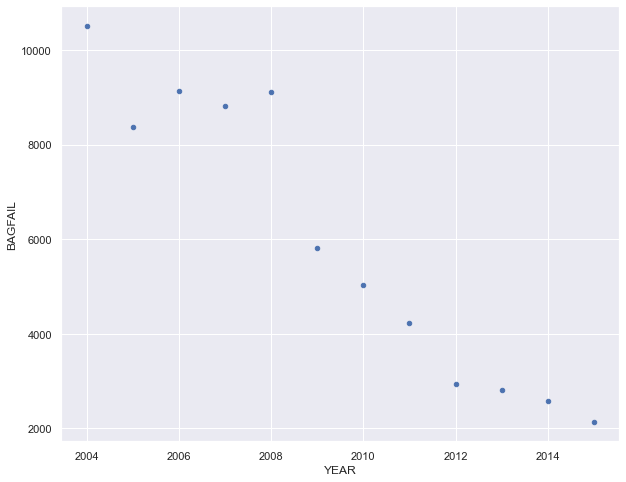

In [42]:
yr.plot.scatter(yr.columns[-1],yr.columns[4]) # wykres ilości przypadków na dany rok
pass

# #SEATPOS:
# x = np.array(['YEAR'])
# y = np.array(['SEATPOS'])
# plt.scatter(x, y)
# #BAGFAIL:
# x = np.array(['YEAR'])
# y = np.array(['BAGFAIL'])
# plt.scatter(x, y)
# plt.show()

## MANUSE - 

In [47]:
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
pasy_vs_obrazenia2.sum()

NameError: name 'pasy_vs_obrazenia2' is not defined

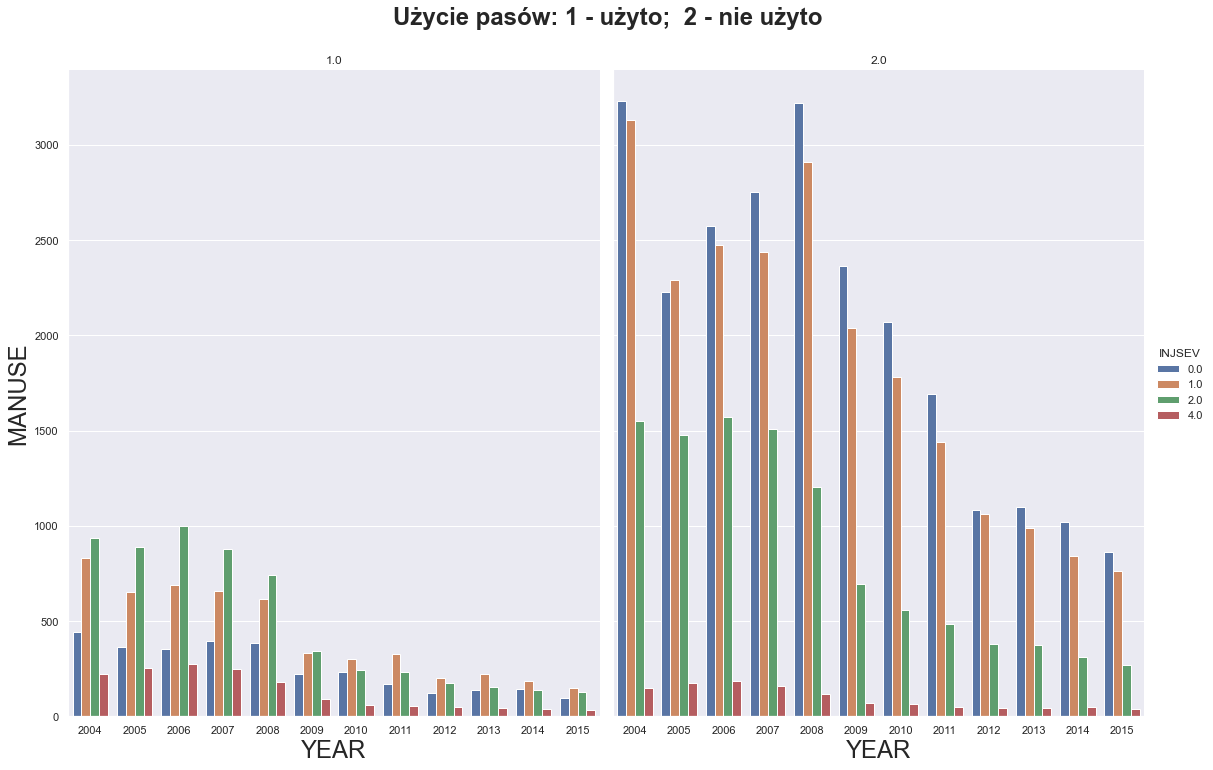

In [62]:
g = sns.catplot(data=dfo, x='YEAR', col="MANUSE", hue="INJSEV", kind='count',aspect=0.8,height=10, sharey = True)   
g.set_axis_labels("YEAR", "MANUSE",fontsize=24)
g._legend.set_title('INJSEV')    
g.set_titles('{col_name}')
g.fig.suptitle('Użycie pasów: 1 - użyto;  2 - nie użyto', y=1.05, fontsize=24, fontweight='semibold');

In [ ]:
prawodpodobienstwo_obrazen_vs_pasy=pasy_vs_obrazenia2/pasy_vs_obrazenia2.sum()

In [48]:
yearly_manuse=dfo.groupby(["MANUSE"])['MANUSE'].count()/dfo.shape[0]
yearly_manuse

MANUSE
1.0    0.147455
2.0    0.540254
Name: MANUSE, dtype: float64

In [52]:
%cd "D:\PYTHON UBER"
manuse=pd.read_csv("./MANUSE_Q.csv",sep=';')
manuse

D:\PYTHON UBER


,YEAR,MANUSE,MANUSE_Q
0,2004,1.0,2514
1,2004,2.0,8297
2,2005,1.0,2245
3,2005,2.0,6334
4,2006,1.0,2421
5,2006,2.0,7047
6,2007,1.0,2264
7,2007,2.0,7091
8,2008,1.0,2020
9,2008,2.0,7721


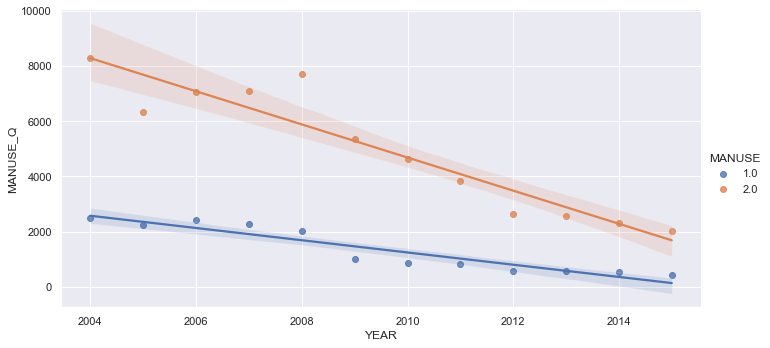

In [54]:
sns.lmplot(data=manuse[((manuse['MANUSE'] == 1) | (manuse['MANUSE'] == 2))],         #1 - not used;  2 - used
            x="YEAR",
            y="MANUSE_Q",
            aspect=2, 
            hue='MANUSE')

In [65]:
ZERO = dfo.query('INJSEV == 0')['CASEID'].count()
JEDEN = dfo.query('INJSEV == 1')['CASEID'].count()
DWA = dfo.query('INJSEV == 2')['CASEID'].count()
TRZY = dfo.query('INJSEV == 3')['CASEID'].count()
CZTERY = dfo.query('INJSEV == 4')['CASEID'].count()
SZE = dfo.query('INJSEV == 6')['CASEID'].count()
CZTERY
INJSEV0 = ZERO / dfo['CASEID'].count()
INJSEV1 = JEDEN / dfo['CASEID'].count()
INJSEV2 = DWA / dfo['CASEID'].count()
INJSEV3 = TRZY / dfo['CASEID'].count()
INJSEV4 = CZTERY / dfo['CASEID'].count()
INJSEV6 = SZE / dfo['CASEID'].count()

D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python


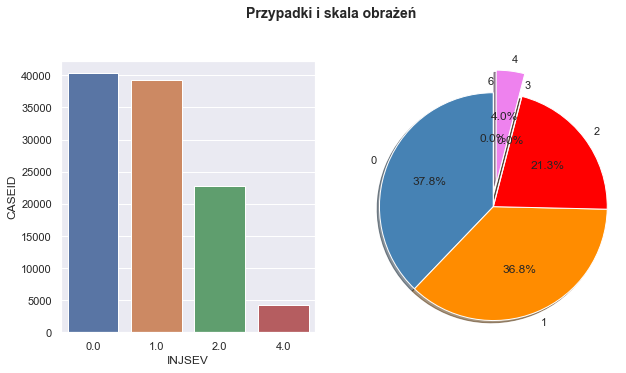

In [67]:
%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python"
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
plt.figure(figsize = [10, 5])

# wykres slupkowy
plt.subplot(1, 2, 1)

g = sns.countplot(data=dfo, x="INJSEV", order=dfo.INJSEV.value_counts().index)
g.set_xlabel('INJSEV')
g.set_ylabel('CASEID')

# pie chart
plt.subplot(1, 2, 2)

labels = [0,1,2,3,4,6]
sizes = [INJSEV0, INJSEV1,INJSEV2,INJSEV3,INJSEV4,INJSEV6]
colors = ['steelblue', 'darkorange','RED','GREEN','VIOLET','BROWN']
explode = (0, 0,0,0,0.2,0)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Przypadki i skala obrażeń', y=1.03, fontsize=14, fontweight='semibold');